In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Basic Operation

In [ ]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary_data.shape

(30, 2)

Visualisation of Data points

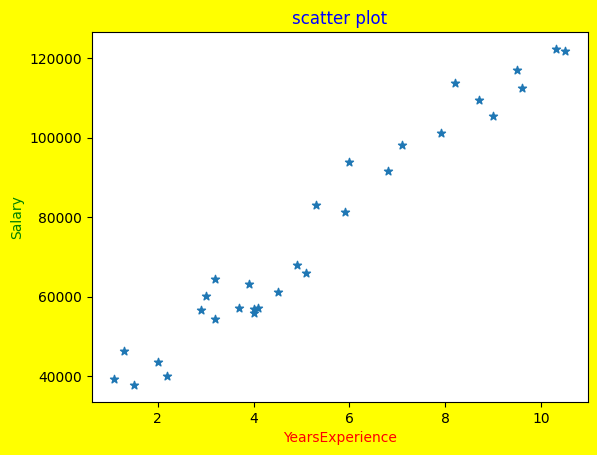

In [ ]:
#finding relationship
plt.figure(facecolor='yellow')
plt.axes()
plt.scatter(salary_data['YearsExperience'],salary_data['Salary'],marker='*')
plt.title('scatter plot',color="blue")
plt.xlabel("YearsExperience",color="red",size=10)
plt.ylabel("Salary",color="green",size=10)
plt.show()

The realtion between year experience and salary is linear

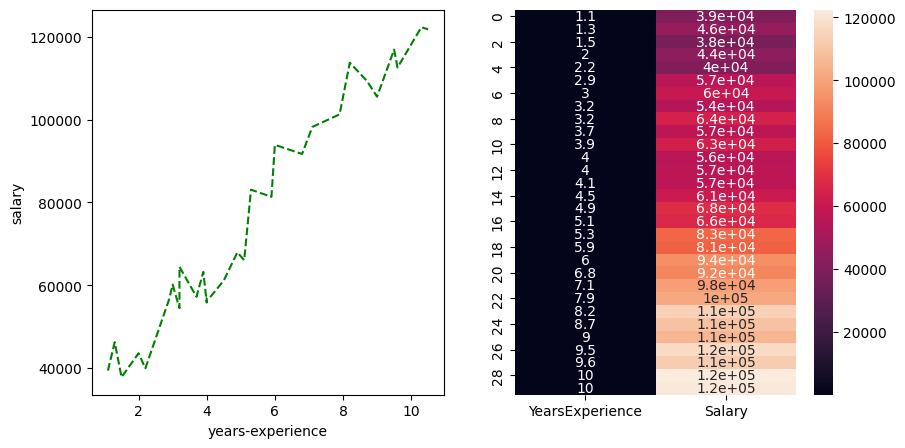

In [ ]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.plot(salary_data['YearsExperience'],salary_data['Salary'],label = 'salary',color="green",linestyle="dashed");
plt.xlabel('years-experience');
plt.ylabel('salary');
plt.subplot(1,2,2);
sns.heatmap(data=salary_data, annot=True)
plt.show()

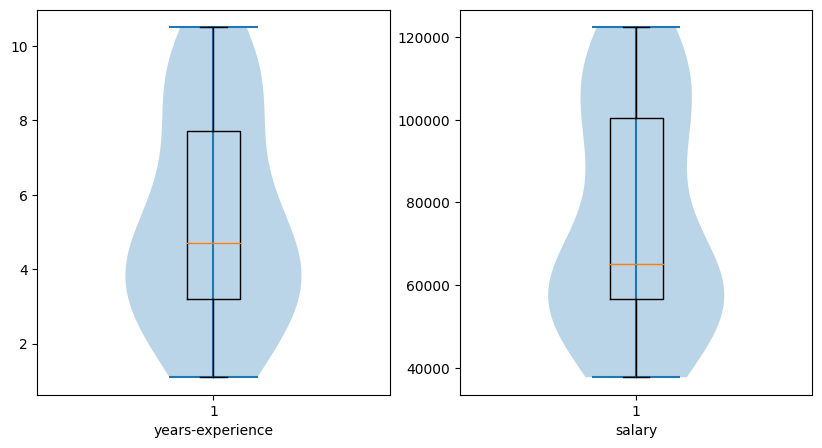

In [ ]:
#checking outliers
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.violinplot(salary_data['YearsExperience'])
plt.boxplot(salary_data['YearsExperience'])
plt.xlabel('years-experience')
plt.subplot(1,2,2);
plt.violinplot(salary_data['Salary'])
plt.boxplot(salary_data['Salary'])
plt.xlabel('salary')
plt.show()

There are no outliers in data set 

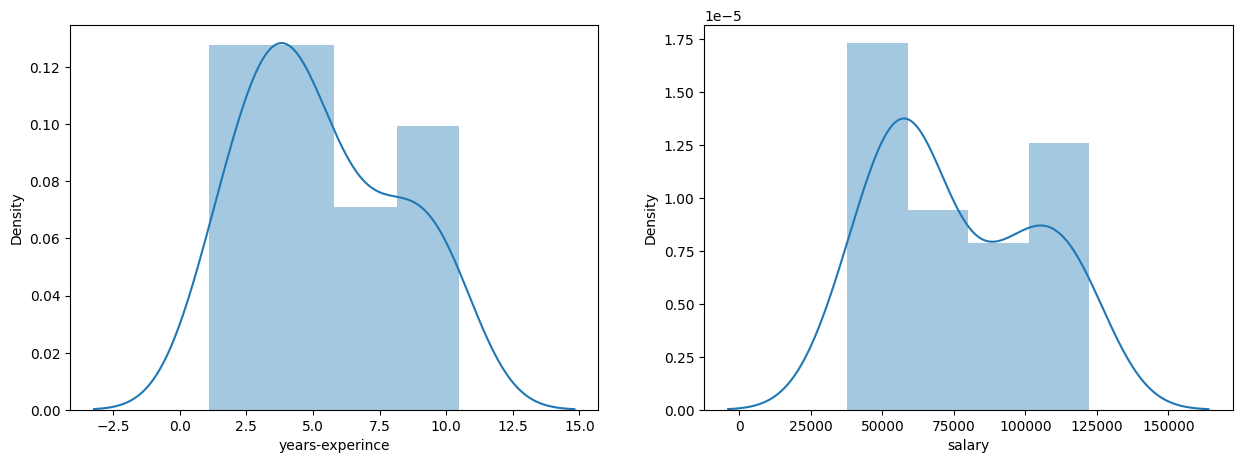

In [ ]:
#checking datapoints area
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
sns.distplot(salary_data['YearsExperience'])
plt.xlabel('years-experince')
plt.subplot(1,2,2);
sns.distplot(salary_data['Salary'])
plt.xlabel('salary')
plt.show()

* In years exprience more data is between 1 and 7
* In sorting time more data is between 45000 and 100000

Statistics & Regression

In [ ]:
#correlation
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


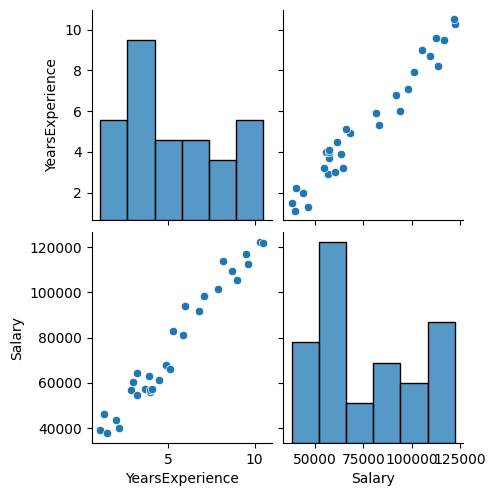

In [ ]:
#pairplot 
sns.pairplot(salary_data)

In [ ]:
#fitting
import statsmodels.formula.api as smf
salary_model = smf.ols('Salary~YearsExperience',data = salary_data).fit()
     


<Axes: xlabel='YearsExperience', ylabel='Salary'>

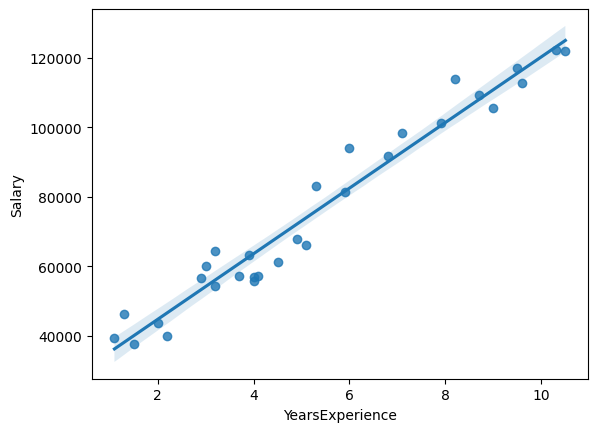

In [ ]:
#regression plot
sns.regplot(x="YearsExperience", y="Salary", data=salary_data)

In [ ]:
# fitted model summary
salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.14e-20
Time:                        08:15:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#coefficients
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
# t and p a values
print(salary_model.tvalues,'\n' ,salary_model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
# model prediction
salary_hike=(25792.200199)+(9449.962321)*3
salary_hike

54142.087162

In [ ]:
salary_data_pred=pd.DataFrame(pd.Series([5,8]),columns=['YearsExperience'])
salary_data_pred

,YearsExperience
0,5
1,8


In [ ]:
salary_model.predict(salary_data_pred)

0     73042.011806
1    101391.898770
dtype: float64

Transformation with log

In [ ]:
x=salary_data['YearsExperience']
y=salary_data.Salary

salary_data['log_x']=np.log(x)
salary_data['log_y']=np.log(y)

salary_data.head()

,YearsExperience,Salary,log_x,log_y
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


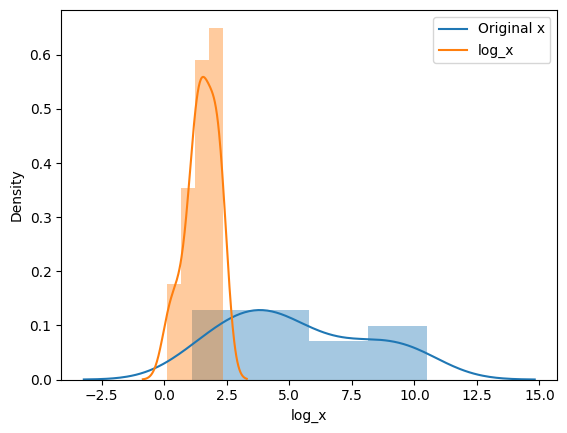

In [ ]:
#plotting
sns.distplot(x)
sns.distplot(salary_data.log_x)
labels=("Original x","log_x")
plt.legend(labels)

In [ ]:
# Building Linear Regression Model with log_x
salary_model2=smf.ols("log_y~log_x",data=salary_data).fit()

In [ ]:
salary_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 31 May 2023   Prob (F-statistic):           7.40e-16
Time:                        08:18:43   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
log_x          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Boxcox Transformation

In [ ]:
#BOXCOX TRANSFORMATION of x and y
x=salary_data['YearsExperience']
y=salary_data.Salary

bc_x=stats.boxcox(x)
bc_x=list(bc_x)
bc_x.pop()
bc_x=bc_x[0]
salary_data["bc_x"]=bc_x

bc_y=stats.boxcox(y)
bc_y=list(bc_y)
bc_y.pop()
bc_y=bc_y[0]
salary_data["bc_y"]=bc_y

salary_data.head()

,YearsExperience,Salary,log_x,log_y,bc_x,bc_y
0,1.1,39343.0,0.095310,10.580073,0.097408,15.936022
1,1.3,46205.0,0.262364,10.740843,0.278674,16.285303
2,1.5,37731.0,0.405465,10.538237,0.445296,15.845799
3,2.0,43525.0,0.693147,10.681091,0.814970,16.155010
4,2.2,39891.0,0.788457,10.593906,0.948515,15.965914


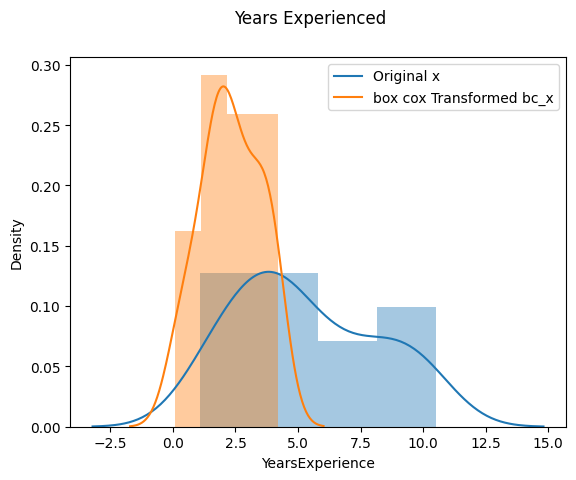

In [ ]:
# boxcox Transformed Data plot
plt.suptitle("Years Experienced")
sns.distplot(x)
sns.distplot(bc_x)
labels=("Original x","box cox Transformed bc_x")
plt.legend(labels)

In [ ]:
# Linear Regression Model
salary_model3=smf.ols("bc_x~bc_x",data=salary_data).fit()

In [ ]:
salary_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bc_x   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.284e+32
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        08:20:30   Log-Likelihood:                 1011.7
No. Observations:                  30   AIC:                            -2019.
Df Residuals:                      28   BIC:                            -2017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.882e-16    2.3e-16      3.865      0.001    4.18e-16    1.36e-15
bc_x           1.0000   8.83e-17   1.13e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.182
Skew:                           0.004   Prob(JB):                        0.554
Kurtosis:                       2.028   Cond. No.                         6.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

conclusion:

In [ ]:
# comparing above 3 models
test_data={'Model':pd.Series(['linearModel without Transformation','log Transformation','Boxcox  Transformation']),
     'R Squared':pd.Series([salary_model3.rsquared,salary_model2.rsquared,salary_model3.rsquared]),
     'adjR Squared':pd.Series([salary_model.rsquared_adj,salary_model2.rsquared_adj,salary_model3.rsquared_adj])}
     
test_table=pd.DataFrame(test_data)
test_table

,Model,R Squared,adjR Squared
0,linearModel without Transformation,1.000000,0.955419
1,log Transformation,0.905215,0.901830
2,Boxcox Transformation,1.000000,1.000000


Out of these three models the original model is giving best accuracy. i.e, 95%